In [190]:
import findspark
findspark.init()

In [191]:
import pyspark
from pyspark.sql import SparkSession, functions, types
spark = SparkSession.builder.appName('Players').getOrCreate()


In [192]:
df = spark.read.csv('Downloads/data.csv')

In [ ]:
df.show(n=3)

In [193]:
df = df.withColumn('_c2',df['_c2'].cast(types.IntegerType())) #corners
df = df.withColumn('_c3',df['_c3'].cast(types.IntegerType())) #fouls
df = df.withColumn('_c4',df['_c4'].cast(types.IntegerType())) #freekicks
df = df.withColumn('_c5',df['_c5'].cast(types.IntegerType())) #goals
#df_a = df.select('_c2','_c3','_c4','_c5')

In [194]:
all_teams= []
team_names = df.select('_c6').distinct().collect()
for i in range(0,len(team_names)-1):
    all_teams.append(team_names[i][0])

In [195]:
teams = df.select('_c6','_c61').distinct().orderBy('_c61')
teams = teams.groupBy('_c61').agg(functions.count(teams._c6).alias('total_teams'))
#teams = teams.filter(teams._c61 == 'Primera División')
#teams.show(truncate=False)
teams.show()


+----------------+-----------+
|            _c61|total_teams|
+----------------+-----------+
|            null|          0|
|      Bundesliga|         35|
|         Ligue 1|         40|
|  Premier League|         39|
|Primera División|         41|
|         Serie A|         38|
|          league|          1|
+----------------+-----------+



In [196]:
#league = df.select('_c61',functions.substring(df._c29,-4,4).alias('_c29'),'_c5','_c36')
league = df.select('_c61','_c64','_c5','_c36','_c67')
#league.show()

In [197]:
league_agg1 = league.groupBy('_c61','_c64').agg(functions.sum('_c5').alias('sum_c5'))
league_agg2 = league.groupBy('_c61','_c64').agg(functions.sum('_c36').alias('sum_c36'))
league_agg2 = league_agg2.withColumnRenamed('_c61','new_c61')
league_agg2 = league_agg2.withColumnRenamed('_c64','new_c64')
league_agg = league_agg1.join(league_agg2,[league_agg1._c61 == league_agg2.new_c61,league_agg1._c64 == league_agg2.new_c64])
league_agg = league_agg.withColumn('total', sum(league_agg[col] for col in ['sum_c5','sum_c36']))
league_agg = league_agg.drop('new_c61','new_c64','sum_c5','sum_c36')
league_agg = league_agg.orderBy('_c64')
###########league_agg = league_agg.withColumn(col='total_teams',)
league_agg.show()

+----------------+---------+------+
|            _c61|     _c64| total|
+----------------+---------+------+
|      Bundesliga|2004/2005| 890.0|
|  Premier League|2004/2005| 975.0|
|Primera División|2004/2005| 980.0|
|         Ligue 1|2004/2005| 826.0|
|         Serie A|2004/2005| 960.0|
|         Serie A|2005/2006| 991.0|
|         Ligue 1|2005/2006| 811.0|
|Primera División|2005/2006| 936.0|
|      Bundesliga|2005/2006| 861.0|
|  Premier League|2005/2006| 944.0|
|         Serie A|2006/2007| 969.0|
|Primera División|2006/2007| 942.0|
|         Ligue 1|2006/2007| 855.0|
|      Bundesliga|2006/2007| 837.0|
|  Premier League|2006/2007| 931.0|
|         Ligue 1|2007/2008| 868.0|
|      Bundesliga|2007/2008| 860.0|
|         Serie A|2007/2008| 970.0|
|  Premier League|2007/2008|1002.0|
|Primera División|2007/2008|1021.0|
+----------------+---------+------+
only showing top 20 rows



In [198]:
visitors_agg = league.groupBy('_c61','_c64').agg(functions.sum('_c67').alias('total_visitors'))
visitors_agg = visitors_agg.orderBy(visitors_agg.total_visitors.desc())
# league_agg2 = league_agg2.withColumnRenamed('_c61','new_c61')
# league_agg2 = league_agg2.withColumnRenamed('_c64','new_c64')
# league_agg = league_agg1.join(league_agg2,[league_agg1._c61 == league_agg2.new_c61,league_agg1._c64 == league_agg2.new_c64])
# league_agg = league_agg.withColumn('total', sum(league_agg[col] for col in ['sum_c5','sum_c36']))
# league_agg = league_agg.drop('new_c61','new_c64','sum_c5','sum_c36')
# league_agg = league_agg.orderBy('_c64')
# ###########league_agg = league_agg.withColumn(col='total_teams',)
# league_agg.show()
visitors_agg.show(truncate=False)

+--------------+---------+--------------+
|_c61          |_c64     |total_visitors|
+--------------+---------+--------------+
|Premier League|2017/2018|1.4546508E7   |
|Premier League|2007/2008|1.40348E7     |
|Bundesliga    |2011/2012|1.39179E7     |
|Premier League|2013/2014|1.38034E7     |
|Premier League|2012/2013|1.37499E7     |
|Bundesliga    |2017/2018|1.3721095E7   |
|Premier League|2018/2019|1.3694971E7   |
|Premier League|2014/2015|1.35656E7     |
|Premier League|2008/2009|1.3538177E7   |
|Premier League|2006/2007|1.34369E7     |
|Bundesliga    |2014/2015|1.3419597E7   |
|Premier League|2010/2011|1.34064E7     |
|Bundesliga    |2013/2014|1.338252E7    |
|Premier League|2016/2017|1.3242472E7   |
|Premier League|2011/2012|1.31465E7     |
|Bundesliga    |2010/2011|1.31364E7     |
|Bundesliga    |2012/2013|1.3127568E7   |
|Bundesliga    |2008/2009|1.30889E7     |
|Bundesliga    |2009/2010|1.30753E7     |
|Premier League|2009/2010|1.29775E7     |
+--------------+---------+--------

In [199]:
teams = teams.withColumnRenamed('_c61','new_c61')
joined = league_agg.join(teams, league_agg._c61 == teams.new_c61).drop(teams.new_c61)
joined = joined.select('_c61','_c64',(joined.total/joined.total_teams).alias('average')).orderBy(joined._c61,joined._c64)
joined.show()

+----------+---------+------------------+
|      _c61|     _c64|           average|
+----------+---------+------------------+
|Bundesliga|2004/2005|25.428571428571427|
|Bundesliga|2005/2006|              24.6|
|Bundesliga|2006/2007|23.914285714285715|
|Bundesliga|2007/2008|24.571428571428573|
|Bundesliga|2008/2009|25.685714285714287|
|Bundesliga|2009/2010| 24.82857142857143|
|Bundesliga|2010/2011| 25.62857142857143|
|Bundesliga|2011/2012|              25.2|
|Bundesliga|2012/2013|25.857142857142858|
|Bundesliga|2013/2014|27.685714285714287|
|Bundesliga|2014/2015|24.228571428571428|
|Bundesliga|2015/2016| 24.82857142857143|
|Bundesliga|2016/2017|25.114285714285714|
|Bundesliga|2017/2018|24.571428571428573|
|Bundesliga|2018/2019| 26.62857142857143|
|   Ligue 1|2004/2005|             20.65|
|   Ligue 1|2005/2006|            20.275|
|   Ligue 1|2006/2007|            21.375|
|   Ligue 1|2007/2008|              21.7|
|   Ligue 1|2008/2009|             21.45|
+----------+---------+------------

In [200]:
one = joined.select('average').where(joined._c61 == 'Bundesliga').collect()
two = joined.select('average').where(joined._c61 == 'Ligue 1').collect()
three = joined.select('average').where(joined._c61 == 'Primera División').collect()
four = joined.select('average').where(joined._c61 == 'Premier League').collect()
five = joined.select('average').where(joined._c61 == 'Serie A').collect()

leagues = ['Bundesliga','Ligue 1','Primera División','Premier League','Serie A']

In [201]:
match_results = df.select(df._c5,df._c6,df._c64,df._c30,df._c37,df._c36)
match_results.show()

+----+-------------------+---------+-------+-------------------+----------+
| _c5|                _c6|     _c64|   _c30|               _c37|      _c36|
+----+-------------------+---------+-------+-------------------+----------+
|null|          away name|   season|gameday|          home name|home goals|
|   0|          FC Malaga|2004/2005|      1|    Atletico Madrid|       2.0|
|   1|         Real Betis|2004/2005|      1|        CD Numancia|       1.0|
|   1|Deportivo La Coruna|2004/2005|      1| Espanyol Barcelona|       1.0|
|   1|          FC Getafe|2004/2005|      1|     Real Saragossa|       3.0|
|   1|         Levante UD|2004/2005|      1|      Real Sociedad|       1.0|
|   1|        Real Madrid|2004/2005|      1|       RCD Mallorca|       0.0|
|   0|  Albacete Balompie|2004/2005|      1|         FC Sevilla|       1.0|
|   1|    Athletic Bilbao|2004/2005|      1|         CA Osasuna|       1.0|
|   2|       FC Barcelona|2004/2005|      1|   Racing Santander|       0.0|
|   1|      

In [202]:
sub_results1 = match_results.where(df._c37=='FC Barcelona')
sub_results2 = match_results.where(df._c6=='FC Barcelona')
sub_results3 = match_results.where(df._c37=='Real Madrid')
sub_results4 = match_results.where(df._c6=='Real Madrid')

In [203]:
import matplotlib.pyplot as p
results = match_results.withColumn('results',\
                                   functions.when((functions.col('_c5') > functions.col('_c36')),'away')\
                                   .when((functions.col('_c5') < functions.col('_c36')),'home')\
                                   .otherwise('draw'))

In [204]:
results.show()

+----+-------------------+---------+-------+-------------------+----------+-------+
| _c5|                _c6|     _c64|   _c30|               _c37|      _c36|results|
+----+-------------------+---------+-------+-------------------+----------+-------+
|null|          away name|   season|gameday|          home name|home goals|   draw|
|   0|          FC Malaga|2004/2005|      1|    Atletico Madrid|       2.0|   home|
|   1|         Real Betis|2004/2005|      1|        CD Numancia|       1.0|   draw|
|   1|Deportivo La Coruna|2004/2005|      1| Espanyol Barcelona|       1.0|   draw|
|   1|          FC Getafe|2004/2005|      1|     Real Saragossa|       3.0|   home|
|   1|         Levante UD|2004/2005|      1|      Real Sociedad|       1.0|   draw|
|   1|        Real Madrid|2004/2005|      1|       RCD Mallorca|       0.0|   away|
|   0|  Albacete Balompie|2004/2005|      1|         FC Sevilla|       1.0|   home|
|   1|    Athletic Bilbao|2004/2005|      1|         CA Osasuna|       1.0| 

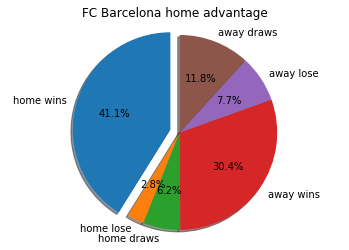

In [205]:
wins_home = results.where(results._c37=='FC Barcelona').where(results.results=='home')
wins_away = results.where(results._c6=='FC Barcelona').where(results.results=='away')
loss_home = results.where(results._c37=='FC Barcelona').where(results.results=='away')
loss_away = results.where(results._c6=='FC Barcelona').where(results.results=='home')
draws_home = results.where(results._c37=='FC Barcelona').where(results.results=='draw')
draws_away = results.where(results._c6=='FC Barcelona').where(results.results=='draw')

labels= 'home wins','home lose','home draws','away wins','away lose','away draws'
sizes = [wins_home.count(),loss_home.count(),draws_home.count(),wins_away.count(),loss_away.count(),draws_away.count()]

explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = p.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
p.title('FC Barcelona home advantage')
p.show()

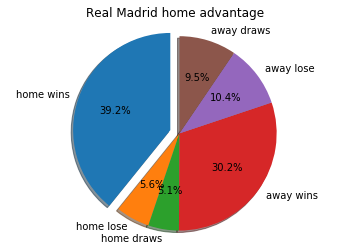

In [206]:
wins_home = results.where(results._c37=='Real Madrid').where(results.results=='home')
wins_away = results.where(results._c6=='Real Madrid').where(results.results=='away')
loss_home = results.where(results._c37=='Real Madrid').where(results.results=='away')
loss_away = results.where(results._c6=='Real Madrid').where(results.results=='home')
draws_home = results.where(results._c37=='Real Madrid').where(results.results=='draw')
draws_away = results.where(results._c6=='Real Madrid').where(results.results=='draw')

labels= 'home wins','home lose','home draws','away wins','away lose','away draws'
sizes = [wins_home.count(),loss_home.count(),draws_home.count(),wins_away.count(),loss_away.count(),draws_away.count()]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = p.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
p.title('Real Madrid home advantage')
p.show()

In [207]:
#sub_results1 = sub_results1.select(sub_results1._c5,sub_results1._c6,functions.substring(sub_results1._c29,-4,4).alias('_c29'),sub_results1._c30,sub_results._c37,sub_results1._c36)
#sub_results2 = sub_results2.select(sub_results2._c5,sub_results1._c6,functions.substring(sub_results2._c29,-4,4).alias('_c29'),sub_results2._c30,sub_results._c37,sub_results2._c36)
#sub_results1.show()

sub_results1 = sub_results1.select(sub_results1._c5,sub_results1._c6,sub_results1._c64,sub_results1._c30,sub_results1._c37,sub_results1._c36)
sub_results2 = sub_results2.select(sub_results2._c5,sub_results2._c6,sub_results2._c64,sub_results2._c30,sub_results2._c37,sub_results2._c36)
sub_results3 = sub_results3.select(sub_results3._c5,sub_results3._c6,sub_results3._c64,sub_results3._c30,sub_results3._c37,sub_results3._c36)
sub_results4 = sub_results4.select(sub_results4._c5,sub_results4._c6,sub_results4._c64,sub_results4._c30,sub_results4._c37,sub_results4._c36)

In [208]:
fcb_home = sub_results1.groupby(sub_results1._c64).agg(functions.sum(sub_results1._c36).alias('_c36')).orderBy('_c64')
#fcb_home.show()
fcb_away = sub_results2.groupby(sub_results2._c64).agg(functions.sum(sub_results2._c36).alias('_c36')).orderBy('_c64')
#fcb_away.show()
rm_home = sub_results3.groupby(sub_results3._c64).agg(functions.sum(sub_results3._c36).alias('_c36')).orderBy('_c64')
#rm_home.show()
rm_away = sub_results4.groupby(sub_results4._c64).agg(functions.sum(sub_results4._c36).alias('_c36')).orderBy('_c64')
#rm_away.show()

In [209]:
a = []
b = []
c = []
d = []
e = []
x1 = fcb_away.select(fcb_away._c64).collect()
x2 = fcb_away.select(fcb_away._c36).collect()
x3 = fcb_home.select(fcb_home._c36).collect()
x4 = rm_away.select(rm_away._c36).collect()
x5 = rm_home.select(rm_home._c36).collect()
for i in range(0,fcb_away.count()):
    a.append(str(x1[i][0]))
    b.append(int(x2[i][0]))
    c.append(int(x3[i][0]))
    d.append(int(x4[i][0]))
    e.append(int(x5[i][0]))

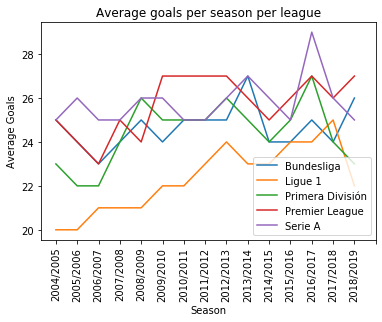

In [210]:
import matplotlib.pyplot as plt1
x=[one,two,three,four,five]
z = [i for i in range(0,16)]
d1 = []
for y in x:
    for i in range(0,len(y)):
        d1.append(int(y[i][0]))
    plt1.plot(a,d1)
    d1 = []
plt1.title('Average goals per season per league')
plt1.xticks(z, a, rotation='vertical')
plt1.xlabel('Season')
plt1.ylabel('Average Goals')
plt1.legend(leagues)
plt1.show()

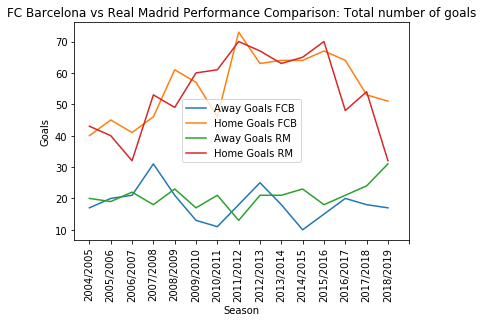

In [211]:
import matplotlib.pyplot as plt
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)
plt.plot(a,e)
plt.xticks(z, a, rotation='vertical')
plt.legend(['Away Goals FCB','Home Goals FCB','Away Goals RM','Home Goals RM'])
plt.title('FC Barcelona vs Real Madrid Performance Comparison: Total number of goals')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

In [212]:
players_data = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_20.csv')

# players19 = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_19.csv')
# players18 = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_18.csv')
# players17 = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_17.csv')
# players16 = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_16.csv')
# players15 = spark.read.csv('Downloads/fifa-20-complete-player-dataset/players_15.csv')

# players20 = players20.select('_c2','_c4','_c6','_c7','_c8','_c20')
# players19 = players19.select('_c2','_c4','_c6','_c7','_c8','_c20')
# players18 = players18.select('_c2','_c4','_c6','_c7','_c8','_c20')
# players17 = players17.select('_c2','_c4','_c6','_c7','_c8','_c20')
# players16 = players16.select('_c2','_c4','_c6','_c7','_c8','_c20')
# players15 = players15.select('_c2','_c4','_c6','_c7','_c8','_c20')

# players_data = players20.unionAll(players19).distinct()
# players_data = players_data.unionAll(players18).distinct()
# players_data = players_data.unionAll(players17).distinct()
# players_data = players_data.unionAll(players16).distinct()
# players_data = players_data.unionAll(players15).distinct()

In [213]:
players_data.show(n=3)

+---------+--------------------+-----------------+--------------------+---+----------+---------+---------+-----------+------------+-------+---------+---------+--------+----------------+--------------+--------------------+---------+-----------+----------+----------+---------+------------------+--------------------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------+--------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+--------------------+--------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+--------------------+--------------------+--------------

In [214]:
#players_data.show(n=3)
cc = spark.read.csv('Downloads/countryContinent.csv')
cc = cc.select('_c0','_c5')

In [215]:
players_a = players_data.select('_c4','_c6','_c7','_c8','_c9','_c10','_c11','_c20','_c31','_c36','_c56','_c61','_c64')
#'age','height','weight','nationality','club',body type','overall rating','potential','pace','physique','movement agility','stamina','aggression'
nationalities_agg = players_data.select('_c8').distinct()
nationalities_agg = nationalities_agg.join(cc, nationalities_agg._c8 == cc._c0).drop('_c0')
players_a = players_a.join(nationalities_agg, players_a._c8 == nationalities_agg._c8).drop('_c8')
nationalities_agg = players_a.select('_c5').distinct()
l = nationalities_agg.collect()
country_list = {}
for i in range(0,len(l)):
    country_list.update({l[i][0]:str(i+1)})
country_list

{'Europe': '1', 'Africa': '2', 'Americas': '3', 'Oceania': '4', 'Asia': '5'}

In [216]:
#body_type = players_data.select('_c20').distinct()
players_a = players_a.withColumn('_c20',\
                                   functions.when((functions.col('_c20') == 'Lean'),3)\
                                   .when((functions.col('_c20') == 'Normal'),2)\
                                    .when((functions.col('_c20') == 'Stocky'),1)\
                                   .otherwise(0))

# players_a = players_a.withColumn('_c15',\
#                                    functions.when((functions.col('_c15') == 'Right'),1)\
#                                    .otherwise(2))
# print(players_data.count())
# players_data = players_data.filter(players_data['_c20']!=0)
# print(players_data.count())

In [217]:
# players_data = players_data.withColumn('_c4',players_data['_c4'].cast(types.IntegerType())) #age
# players_data = players_data.withColumn('_c6',players_data['_c6'].cast(types.IntegerType())) #height
# players_data = players_data.withColumn('_c7',players_data['_c7'].cast(types.IntegerType())) #weight
# players_data = players_data.withColumn('_c31',players_data['_c31'].cast(types.IntegerType())) #weight
# players_data = players_data.withColumn('_c36',players_data['_c36'].cast(types.IntegerType())) #weight
players_a = players_a.replace(country_list,1,'_c5')

players_b = players_a.select(players_a._c7,players_a._c5,players_a._c9)
players_b = players_b.groupBy('_c5').agg(functions.avg('_c7').alias('average')).orderBy('_c5')
players_c = players_a.select(players_a._c5,players_a._c20,players_a._c9)
players_c = players_c.groupBy('_c5','_c20').agg(functions.count('_c20').alias('count')).orderBy('_c5')
players_c = players_c.withColumn('_c20',\
                                   functions.when((functions.col('_c20') == 3),'Lean')\
                                   .when((functions.col('_c20') == 2),'Normal')\
                                    .when((functions.col('_c20') == 1),'Stocky')\
                                   .otherwise('null'))
players_c = players_c.filter(players_c['_c20']!='null')




In [218]:
players_d = players_a.select('_c4','_c9').groupBy('_c9').agg(functions.avg('_c4').alias('average_age')).orderBy('average_age')
players_d.show(truncate=False)

+--------------------------+------------------+
|_c9                       |average_age       |
+--------------------------+------------------+
|US Orléans Loiret Football|19.0              |
|Milton Keynes Dons        |19.0              |
|Bohemian FC               |19.0              |
|Crewe Alexandra           |20.0              |
|Oxford United             |20.0              |
|Bolton Wanderers          |20.0              |
|Blackpool                 |20.666666666666668|
|Bayern München II         |20.962962962962962|
|Finland                   |21.0              |
|Peterborough United       |21.0              |
|FC Nordsjælland           |21.0              |
|Rochdale                  |21.0              |
|Śląsk Wrocław             |21.0              |
|Ross County FC            |21.0              |
|PFC CSKA Moscow           |21.25             |
|Stevenage                 |21.5              |
|Portsmouth                |21.5              |
|Godoy Cruz                |21.607142857

In [219]:
players_a = players_a.toPandas()
players_a.to_csv('cleaned.csv',index=False)

[Text(0, 0.5, 'Continents'), Text(0.5, 0, 'Average Weights')]

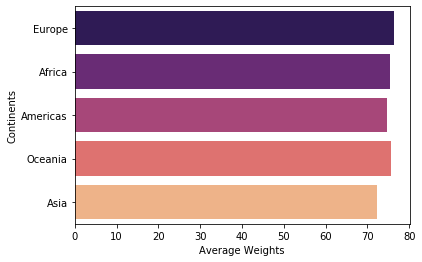

In [220]:
import seaborn as sns
inv_map = {v: k for k, v in country_list.items()}
players_b = players_b.replace(inv_map,1,'_c5')

p = players_b.toPandas()
ax = sns.barplot(x='average',y='_c5',data = p, palette='magma')
ax.set(xlabel='Average Weights',ylabel='Continents')

In [221]:
players_c = players_c.replace(inv_map,1,'_c5')
players_c = players_c.toPandas()

In [223]:
players_c

,_c5,_c20,count
0,Europe,Lean,2871
1,Europe,Normal,4950
2,Europe,Stocky,341
3,Africa,Normal,574
4,Africa,Lean,383
5,Africa,Stocky,89
6,Americas,Stocky,288
7,Americas,Lean,1078
8,Americas,Normal,2158
9,Oceania,Stocky,12


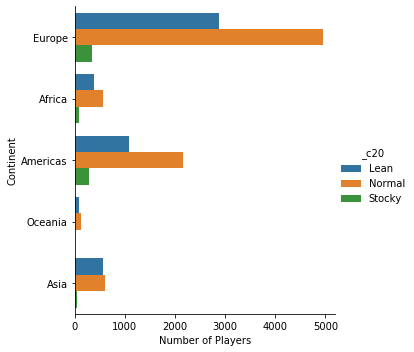

In [224]:
ax = sns.catplot(x="count", y="_c5", hue="_c20", kind="bar", data=players_c)
ax.set(xlabel='Number of Players',ylabel='Continent')

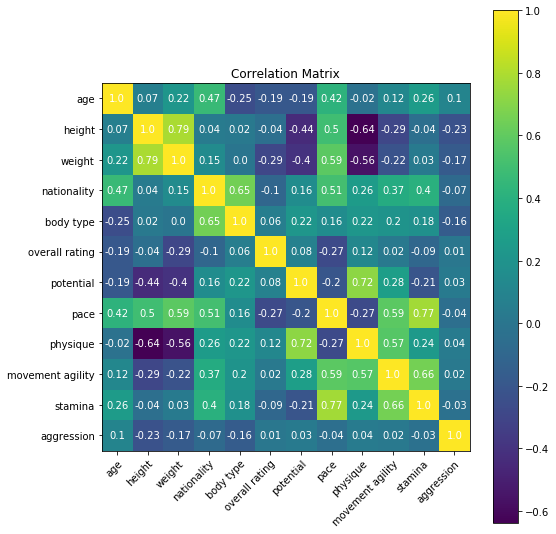

In [312]:
#pd_df._c8 = [country_list[item] for item in pd_df._c8]

####heatmap#####


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = pd.read_csv('cleaned.csv')
df = df[1:]

labels = ['age','height','weight','nationality','body type','overall rating','potential','pace','physique','movement agility','stamina','aggression']

corr = df.corr().to_numpy().round(2)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr) #possible: jet
cbar = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, corr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix")
fig.tight_layout()
plt.savefig('Downloads/myfig.png')
plt.show()


In [34]:
players_data = players_data.withColumn('_c4',players_data['_c4'].cast(types.IntegerType()))
players_data = players_data.filter(players_data._c4.isNotNull())
players_data_mean = players_data.agg(functions.mean('_c4').alias('mean_age')).collect()
mean_age = players_data_mean[0][0]

In [35]:
players_data = players_data.withColumn('OorY',\
                                       functions.when((functions.col('_c4') <= mean_age),'Y')\
                                       .otherwise('O'))
players_data = players_data.select('_c2','_c4','OorY','_c9')
#players_data.show()

In [36]:
players_agg = players_data.groupBy('_c9').agg(functions.count('OorY').alias('count_of_each_club'))
players_agg.show()
#players_agg.filter()

+--------------------+------------------+
|                 _c9|count_of_each_club|
+--------------------+------------------+
|       Côte d'Ivoire|                 7|
|          Göztepe SK|                28|
|CD Everton de Viñ...|                26|
|     Shonan Bellmare|                 2|
|        Salford City|                28|
|        FC Voluntari|                27|
|              Russia|                10|
|  1. FC Union Berlin|                33|
|            Paraguay|                 9|
|          Sagan Tosu|                30|
|           Puebla FC|                27|
|  Argentinos Juniors|                28|
|     SC Paderborn 07|                33|
|       Karlsruher SC|                28|
|     Cheltenham Town|                24|
|         SC Freiburg|                31|
|San Lorenzo de Al...|                28|
|  SpVgg Unterhaching|                28|
|Universidad Católica|                28|
|           FC Luzern|                25|
+--------------------+------------

In [37]:
sr_1 = sub_results1.select('_c37')
pd_1 = players_data.select('OorY','_c9')
match_players = pd_1.join(sr_1, pd_1._c9 == sr_1._c37).drop('_c37')

sr_2 = sub_results3.select('_c37')
match_players2 = pd_1.join(sr_2, pd_1._c9 == sr_2._c37).drop('_c37')

In [38]:
#match_players.show()
match_players_agg = match_players.groupBy('OorY').agg(functions.count('OorY')).collect()
match_players_agg2 = match_players2.groupBy('OorY').agg(functions.count('OorY')).collect()
young1 = match_players_agg[0][1]
old1 = match_players_agg[1][1]
young2 = match_players_agg2[0][1]
old2 = match_players_agg2[1][1]

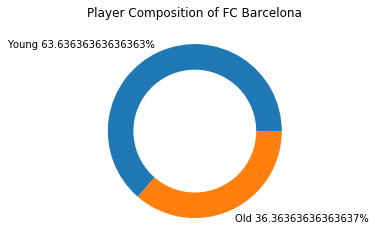

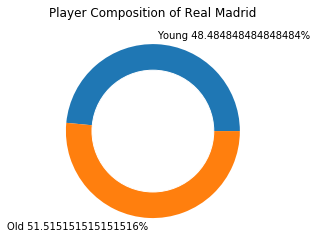

In [39]:
# library
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
 
# create data
labels=['Young ' + str(young1/(young1+old1)*100) + '%' ,'Old ' + str(old1/(young1+old1)*100) + '%']
size_of_groups=[young1,old1]

# Create a pieplot
plt.pie(size_of_groups,labels=labels)
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Player Composition of FC Barcelona') 
plt.show()

labels=['Young ' + str(young2/(young2+old2)*100) + '%' ,'Old ' + str(old2/(young2+old2)*100) + '%']
size_of_groups=[young2,old2]
plt.pie(size_of_groups,labels=labels)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Player Composition of Real Madrid') 
plt.show()


In [40]:
fcb_rm = results.where( ((results._c6=='FC Barcelona')&(results._c37=='Real Madrid')) | ((results._c6=='Real Madrid')&(results._c37=='FC Barcelona')) )
fcb_won = fcb_rm.where(((fcb_rm._c6=='FC Barcelona')&(fcb_rm.results=='away'))|((fcb_rm._c37=='FC Barcelona')&(fcb_rm.results=='home')))
rm_won = fcb_rm.where((fcb_rm._c6=='Real Madrid')&(fcb_rm.results=='away')|((fcb_rm._c37=='Real Madrid')&(fcb_rm.results=='home')))
fcb_rm_draw = fcb_rm.where(fcb_rm.results=='draw')

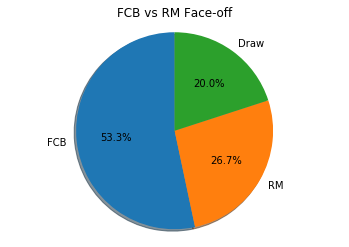

In [41]:
import matplotlib.pyplot as p
labels= 'FCB','RM','Draw'
sizes = [fcb_won.count(),rm_won.count(),fcb_rm_draw.count()]
fig1, ax1 = p.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
p.title('FCB vs RM Face-off')
p.show()

In [42]:
# players_data = players_data.where(players_data['_c9'].isin(all_teams))
# players_data.count()

2184

In [66]:
players_e = players_data.select('_c2','_c4','_c9','_c10','_c11','_c12','_c13','_c14','_c19','_c31','_c32','_c33','_c34','_c35')
players_e1 = players_e.where(players_e['_c4'] >= 32)
players_e.count()

18279

In [67]:
input_player = 'B. Matuidi'
players_e2 = players_e.where(players_e._c2 == input_player)
input_age = players_e2.select(players_e2._c4).collect()
# print(input_age[0][0])
input_potential = players_e2.select(players_e2._c11).collect()
# print(input_potential[0][0])
players_e2 = players_e2.select(functions.split('_c14',',\s*')).collect()
positions = players_e2[0][0]
print(positions)

['CDM', 'CM']


In [68]:
players_e = players_e.where(players_e['_c14'].isin(positions)).orderBy('_c4')
players_e = players_e.where(players_e['_c4'] < input_age[0][0] ).where(players_e['_c11'] >= input_potential[0][0])
#players_e = players_e.where(players_e['_c4'] < input_age[0][0] ).where(players_e['_c11'] <= input_potential[0][0]).where(players_e['_c11'] >= int(input_potential[0][0])-15).orderBy('_c4')
players_e.count()

23

In [69]:
players_e.show()

+----------------+---+--------------------+----+----+--------+------+----+-------------+----+----+----+----+----+
|             _c2|_c4|                 _c9|_c10|_c11|    _c12|  _c13|_c14|         _c19|_c31|_c32|_c33|_c34|_c35|
+----------------+---+--------------------+----+----+--------+------+----+-------------+----+----+----+----+----+
|       E. Millot| 16|           AS Monaco|  63|  86|  800000|  1000|  CM|  High/Medium|  73|  55|  63|  70|  50|
|       L. Agoume| 17|               Inter|  63|  85|  800000|  1000|  CM|Medium/Medium|  65|  54|  59|  64|  46|
|      Riqui Puig| 19|        FC Barcelona|  71|  87| 5000000| 39000|  CM|  High/Medium|  65|  57|  73|  76|  54|
|  Marcos Antonio| 19|    Shakhtar Donetsk|  65|  85| 1100000|  1000|  CM|Medium/Medium|  72|  51|  65|  67|  41|
|Gedson Fernandes| 20|          SL Benfica|  76|  85|12000000| 10000|  CM|    High/High|  79|  70|  73|  76|  71|
|        H. Aouar| 21|  Olympique Lyonnais|  81|  89|26000000| 59000|  CM|  High/Medium|

In [83]:
players_f = players_data.select('_c19','_c24').where(players_data._c19=='High/High').groupBy('_c24').agg(functions.count('_c24').alias('countnum')).orderBy('_c24')

In [84]:
players_f = players_f.orderBy(players_f.countnum.desc())

In [85]:
players_f.show()

+----+--------+
|_c24|countnum|
+----+--------+
| SUB|     336|
|  RB|      71|
| RES|      70|
| RCM|      70|
| LCM|      62|
|  LB|      54|
|  ST|      39|
| CAM|      35|
|  RM|      33|
|  LM|      24|
|  RS|      24|
| LDM|      23|
|  LS|      22|
| RDM|      19|
|  RW|      18|
|  LW|      14|
| LCB|      13|
| RCB|      12|
| CDM|       9|
| RWB|       8|
+----+--------+
only showing top 20 rows



In [255]:
players_data_new_new = spark.read.csv('/Users/aishweryaakapoor/Downloads/Football_data_new/player.csv',header=True)

In [256]:
players_data_new_new.show(n=5)

+------------+---+---+---+-------------------+------+------+------+-----+---+---+------+------------+-------------+-----+----+--------------+---------+--------+---------+----------------+-------------+-------+-----+---------+-----+-----------+------------+------------+--------+------------+------------+-------+---------+-------+-----+----------+-------+-------+--------+----------+---------+----------+-------------+-----------+------+---------+---------+---------+-------+---------------+--------------+-----------+---------+-----------+----------+--------------+-----------+-----------+----------+---+---+------+------+---+---+---+---+---+---+----+
|        Name|Age|OVA|POT|     Team& Contract|    ID|Height|Weight| foot|BOV| BP|Growth|      Joined|Loan Date End|Value|Wage|Release Clause|Attacking|Crossing|Finishing|Heading Accuracy|Short Passing|Volleys|Skill|Dribbling|Curve|FK Accuracy|Long Passing|Ball Control|Movement|Acceleration|Sprint Speed|Agility|Reactions|Balance|Power|Shot Power|

In [303]:
team_a = 'Real Madrid'
team_b = 'Manchester United'

In [304]:
players_g1 = players_data_new_new.select('A/W','Team& Contract').groupBy('Team& Contract','A/W').agg(functions.count('A/W').alias('countaw'))
players_g1 = players_g1.where(players_g1['A/W']!='N/A')
df_one_a = players_g1.where(players_g1['Team& Contract']==team_a)
df_one_b = players_g1.where(players_g1['Team& Contract']==team_b)
df_one_a.show()
df_one_b.show()

+--------------+------+-------+
|Team& Contract|   A/W|countaw|
+--------------+------+-------+
|   Real Madrid|  High|     18|
|   Real Madrid|Medium|     22|
+--------------+------+-------+

+-----------------+------+-------+
|   Team& Contract|   A/W|countaw|
+-----------------+------+-------+
|Manchester United|   Low|      1|
|Manchester United|Medium|     24|
|Manchester United|  High|     18|
+-----------------+------+-------+



In [305]:
players_g2 = players_data_new_new.select('D/W','Team& Contract').groupBy('Team& Contract','D/W').agg(functions.count('D/W').alias('countdw'))
players_g2 = players_g2.where(players_g2['D/W']!='N/A')
df_two_a = players_g2.where(players_g2['Team& Contract']==team_a)
df_two_b = players_g2.where(players_g2['Team& Contract']==team_b)
df_two_a.show()
df_two_b.show()

+--------------+------+-------+
|Team& Contract|   D/W|countdw|
+--------------+------+-------+
|   Real Madrid|   Low|      6|
|   Real Madrid|  High|     10|
|   Real Madrid|Medium|     24|
+--------------+------+-------+

+-----------------+------+-------+
|   Team& Contract|   D/W|countdw|
+-----------------+------+-------+
|Manchester United|Medium|     28|
|Manchester United|  High|     15|
+-----------------+------+-------+



In [306]:
# players_g1 = players_g1.orderBy('Team& Contract')
# players_g2 = players_g2.orderBy('Team& Contract')
# players_g2=players_g2.withColumnRenamed('Team& Contract','Team')
# players_g = players_g1.join(players_g2, players_g1['Team& Contract'] == players_g2['Team'] ).drop('Team& Contract')
# players_g.orderBy('Team').show()
df_one_a = df_one_a.unionAll(df_one_b).distinct().orderBy('Team& Contract','A/W')
df_two_a = df_two_a.unionAll(df_two_b).distinct().orderBy('Team& Contract','D/W')

df_one_a.show()
df_two_a.show()


+-----------------+------+-------+
|   Team& Contract|   A/W|countaw|
+-----------------+------+-------+
|Manchester United|  High|     18|
|Manchester United|   Low|      1|
|Manchester United|Medium|     24|
|      Real Madrid|  High|     18|
|      Real Madrid|Medium|     22|
+-----------------+------+-------+

+-----------------+------+-------+
|   Team& Contract|   D/W|countdw|
+-----------------+------+-------+
|Manchester United|  High|     15|
|Manchester United|Medium|     28|
|      Real Madrid|  High|     10|
|      Real Madrid|   Low|      6|
|      Real Madrid|Medium|     24|
+-----------------+------+-------+



In [307]:
df_one_a=df_one_a.toPandas()
df_two_a=df_two_a.toPandas()

In [308]:
df_two_a

,Team& Contract,D/W,countdw
0,Manchester United,High,15
1,Manchester United,Medium,28
2,Real Madrid,High,10
3,Real Madrid,Low,6
4,Real Madrid,Medium,24


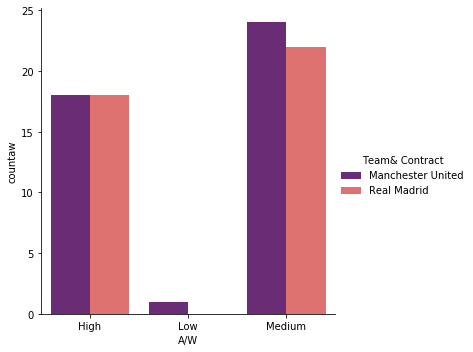

In [309]:
sns.catplot(x = 'A/W' ,y = 'countaw', hue='Team& Contract', kind="bar", data = df_one_a, palette = 'magma')

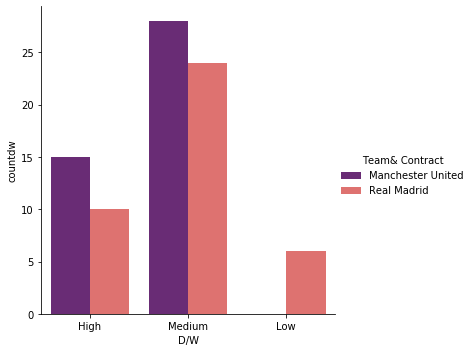

In [310]:
sns.catplot(x = 'D/W' ,y = 'countdw', hue='Team& Contract', kind="bar", data = df_two_a, palette = 'magma')